# Predict House Prices in King County using Machine Learning models?
# Get the best accuracy possible and deliver the solution

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The attributes are defined as follows:

1. id: a notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/bedrooms
6. sqft_living: square footage of the home
7. sqft_lots: quare footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. gradeoverall: grade given to the housing unit, based on King County grading system
13. sqft_above: square footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import numpy

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
import seaborn as sn
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Analyze Data

In [3]:
# Load dataset
house = pd.read_csv('kc_house_data.csv')

In [4]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [11]:
NA_Count =pd.DataFrame({'Sum of NA':house.isnull().sum()}).sort_values(by=['Sum of NA'],ascending=[0])
NA_Count['Percentage'] = NA_Count['Sum of NA']/house.shape[1]
sum(NA_Count['Percentage'])

0.0

In [12]:
# Looking for nulls
print(house.isnull().any())
# Inspecting type
print(house.dtypes)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_

In [13]:
house['date'] = pd.to_datetime(house['date'])
house.price = house.price.astype(int)
house.bathrooms = house.bathrooms.astype(int)
house.floors = house.floors.astype(int)

In [14]:
house["house_age"] = house["date"].dt.year - house['yr_built']
house['renovated'] = house['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

house=house.drop('date', axis=1)
house=house.drop('yr_renovated', axis=1)
house=house.drop('yr_built', axis=1)
house.head(5)

id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900         3          1         1180      5650       1   
1  6414100192  538000         3          2         2570      7242       2   
2  5631500400  180000         2          1          770     10000       1   
3  2487200875  604000         4          3         1960      5000       1   
4  1954400510  510000         3          2         1680      8080       1   

   waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
0           0     0          3      7        1180              0    98178   
1           0     0          3      7        2170            400    98125   
2           0     0          3      6         770              0    98028   
3           0     0          5      7        1050            910    98136   
4           0     0          3      8        1680              0    98074   

       lat     long  sqft_living15  sqft_lot15  house_age  renovated  
0  47.5112 -122.257           1340        5650         59          0  
1  47.7210 -122.319           1690        7639         63          1  
2  47.7379 -122.233           2720        8062         82          0  
3  47.5208 -122.393           1360        5000         49          0  
4  47.6168 -122.045           1800        7503         28          0

In [15]:
correlation = house.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

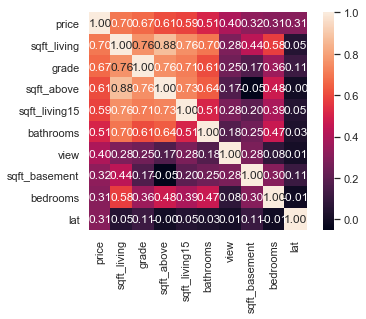

In [16]:
correlation_map = np.corrcoef(house[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [17]:
#From the earlier data.describe() output, I observed that the values of 2 variables - price and sqft_living - are large and will affect the absolute numbers of the regression model. To manage this, I will normalise the data using log.

In [18]:
house['price'] = np.log(house['price'])
house['sqft_living'] = np.log(house['sqft_living'])

In [19]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
renovated          0      0.0
house_age          0      0.0
price              0      0.0
bedrooms           0      0.0
bathrooms          0      0.0
sqft_living        0      0.0
sqft_lot           0      0.0
floors             0      0.0
waterfront         0      0.0
view               0      0.0
condition          0      0.0
grade              0      0.0
sqft_above         0      0.0
sqft_basement      0      0.0
zipcode            0      0.0
lat                0      0.0
long               0      0.0
sqft_living15      0      0.0
sqft_lot15         0      0.0
id                 0      0.0

In [20]:
#The data is pretty clean. There are no pesky nulls which we need to treat and most of the features are in numeric format. Let's go ahead and drop the "id" and "date" columns as these 2 features will not be used in this analysis.

In [23]:
# Dropping the id and date columns
house = house.drop(['id'],axis=1)

## Descriptive Statistics

In [24]:
house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  21613.000000  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean      13.047817      3.370842      1.749734      7.550335  1.510697e+04   
std        0.526685      0.930062      0.734873      0.424807  4.142051e+04   
min       11.225243      0.000000      0.000000      5.669881  5.200000e+02   
25%       12.682152      3.000000      1.000000      7.263330  5.040000e+03   
50%       13.017003      3.000000      2.000000      7.554859  7.618000e+03   
75%       13.377006      4.000000      2.000000      7.843849  1.068800e+04   
max       15.856731     33.000000      8.000000      9.513404  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.446213      0.007542      0.234303      3.409430      7.656873   
std        0.551894      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.000000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement       zipcode           lat          long  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045  98077.939805     47.560053   -122.213896   
std      828.090978     442.575043     53.505026      0.138564      0.140828   
min      290.000000       0.000000  98001.000000     47.155900   -122.519000   
25%     1190.000000       0.000000  98033.000000     47.471000   -122.328000   
50%     1560.000000       0.000000  98065.000000     47.571800   -122.230000   
75%     2210.000000     560.000000  98118.000000     47.678000   -122.125000   
max     9410.000000    4820.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15     house_age     renovated  
count   21613.000000   21613.000000  21613.000000  21613.000000  
mean     1986.552492   12768.455652     43.317818      0.042289  
std       685.391304   27304.179631     29.375493      0.201253  
min       399.000000     651.000000     -1.000000      0.000000  
25%      1490.000000    5100.000000     18.000000      0.000000  
50%      1840.000000    7620.000000     40.000000      0.000000  
75%      2360.000000   10083.000000     63.000000      0.000000  
max      6210.000000  871200.000000    115.000000      1.000000

In [25]:
#From description we can infer that

#Avg price of house sold in King County, USA is $540088.
#Max price of house sold in King County, USA is $7700000.
#Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
#Avg area of house is 2079 Sqft with one house having 13540 Sqft. area

# Data Visualizations

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


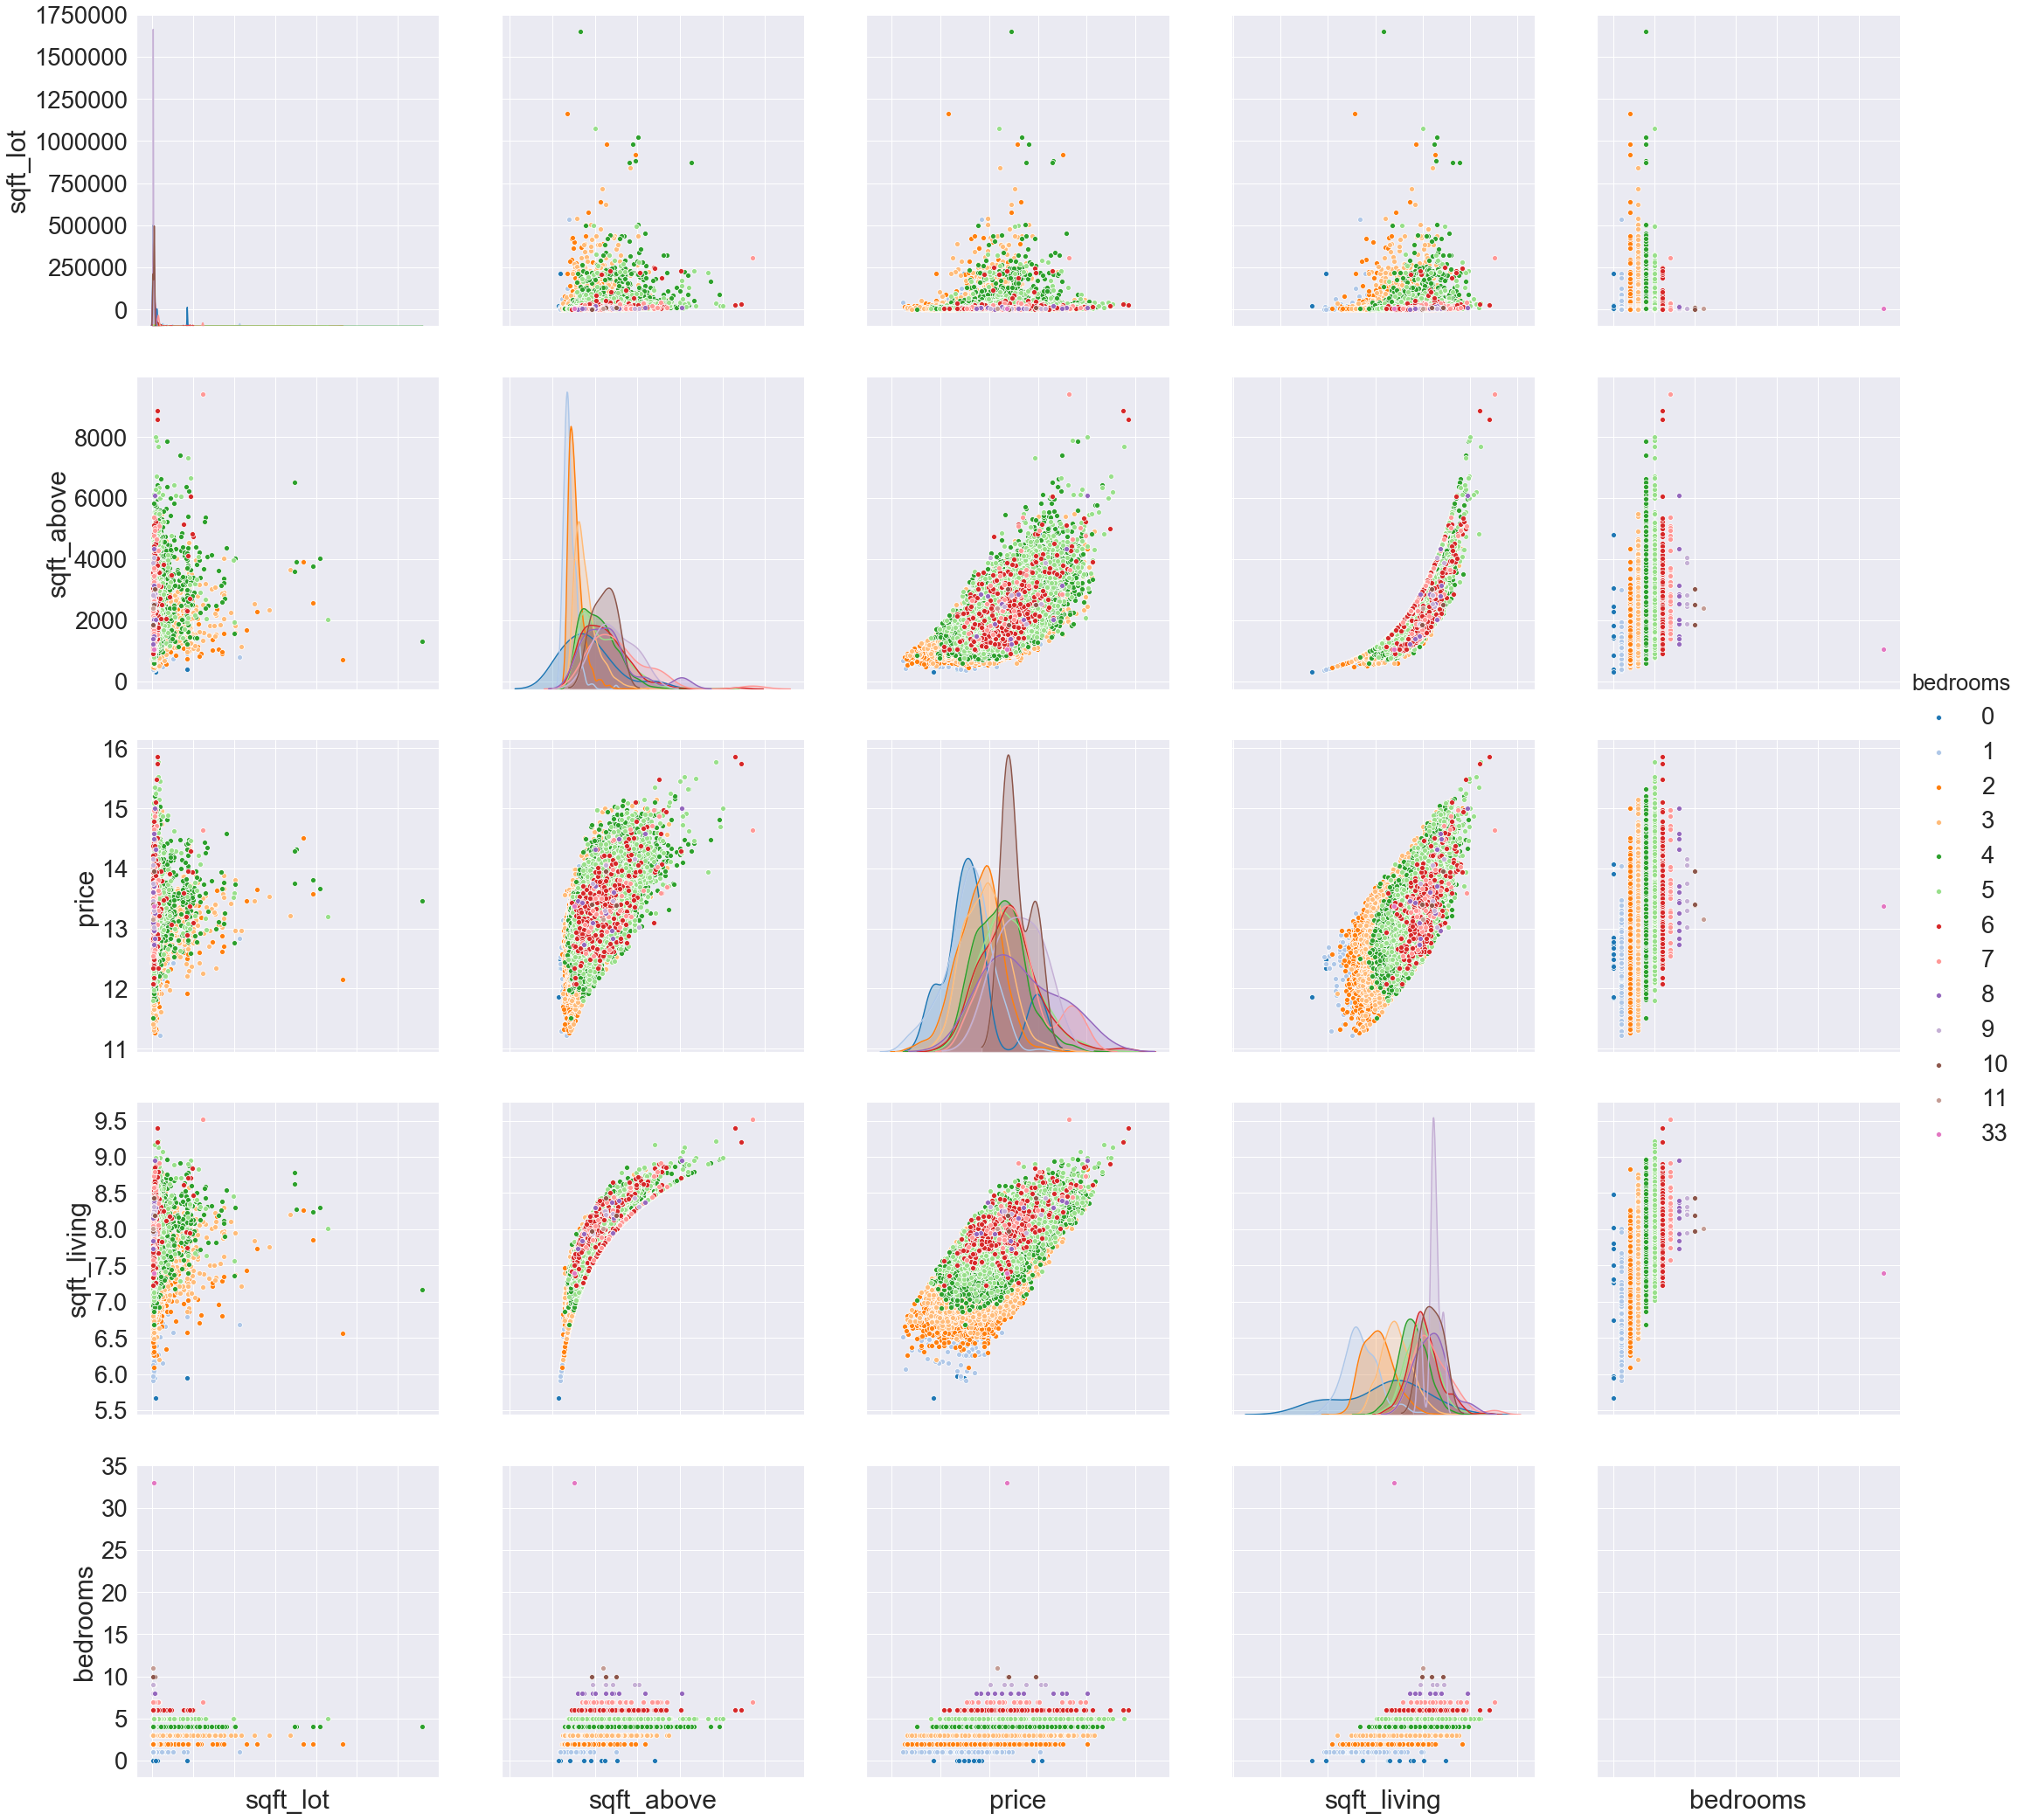

In [27]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [28]:
#From the pairplots, we seem to get the classical linear distribution of the data points, 
#for example with price against sqft_living. This bodes well as in the latter analysis, 
#we will implement some linear models which we will use in our Feature ranking. 
#Let's look at the correlation heatmap:

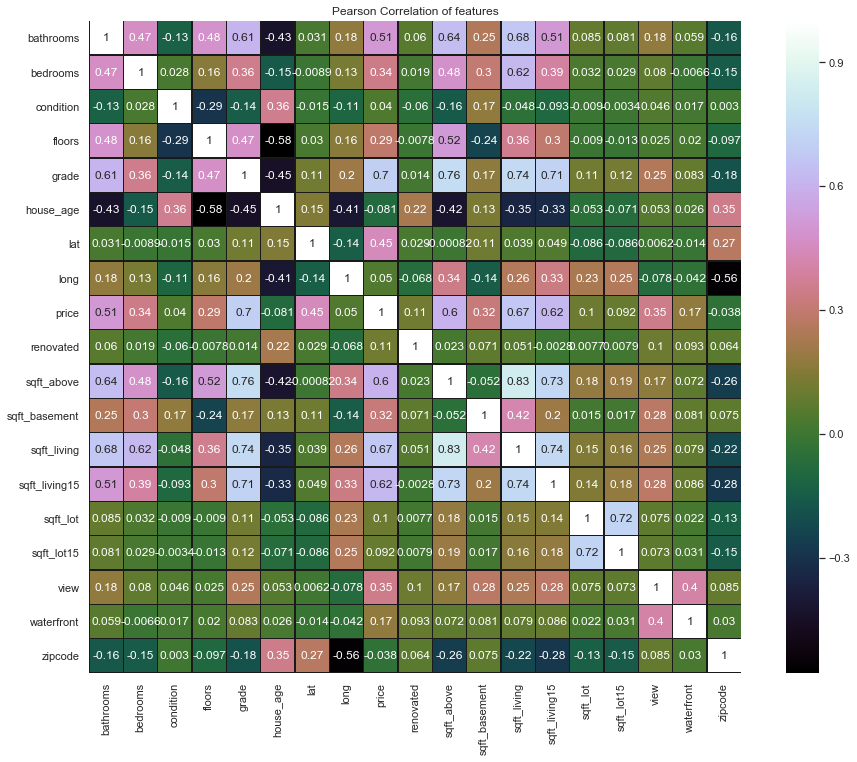

In [29]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = house.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [30]:
# Picking up some of the features that are highly correlated with price
# Correlation between price and sqft_living is (0.7)
# Correlation between price and grade is (0.67)
# Correlation between price and sqft_above is (0.61)
# Correlation between price and sqft_living15 is (0.59)
# Correlation between price and bathrooms is (0.53)

In [31]:
# Now, let us evaluate the correlation of the below features with each others for multicolinearity.
# We would do this later by calculating VIF
# Correlation between sqft_living and sqft_above is (0.88)
# Correlation between sqft_living and sqft_living15 is (0.76)
# Correlation between sqft_living and grade is (0.76)
# Correlation between sqft living and bathrooms is (0.75)
# We would keep grade as of now as it is a category.

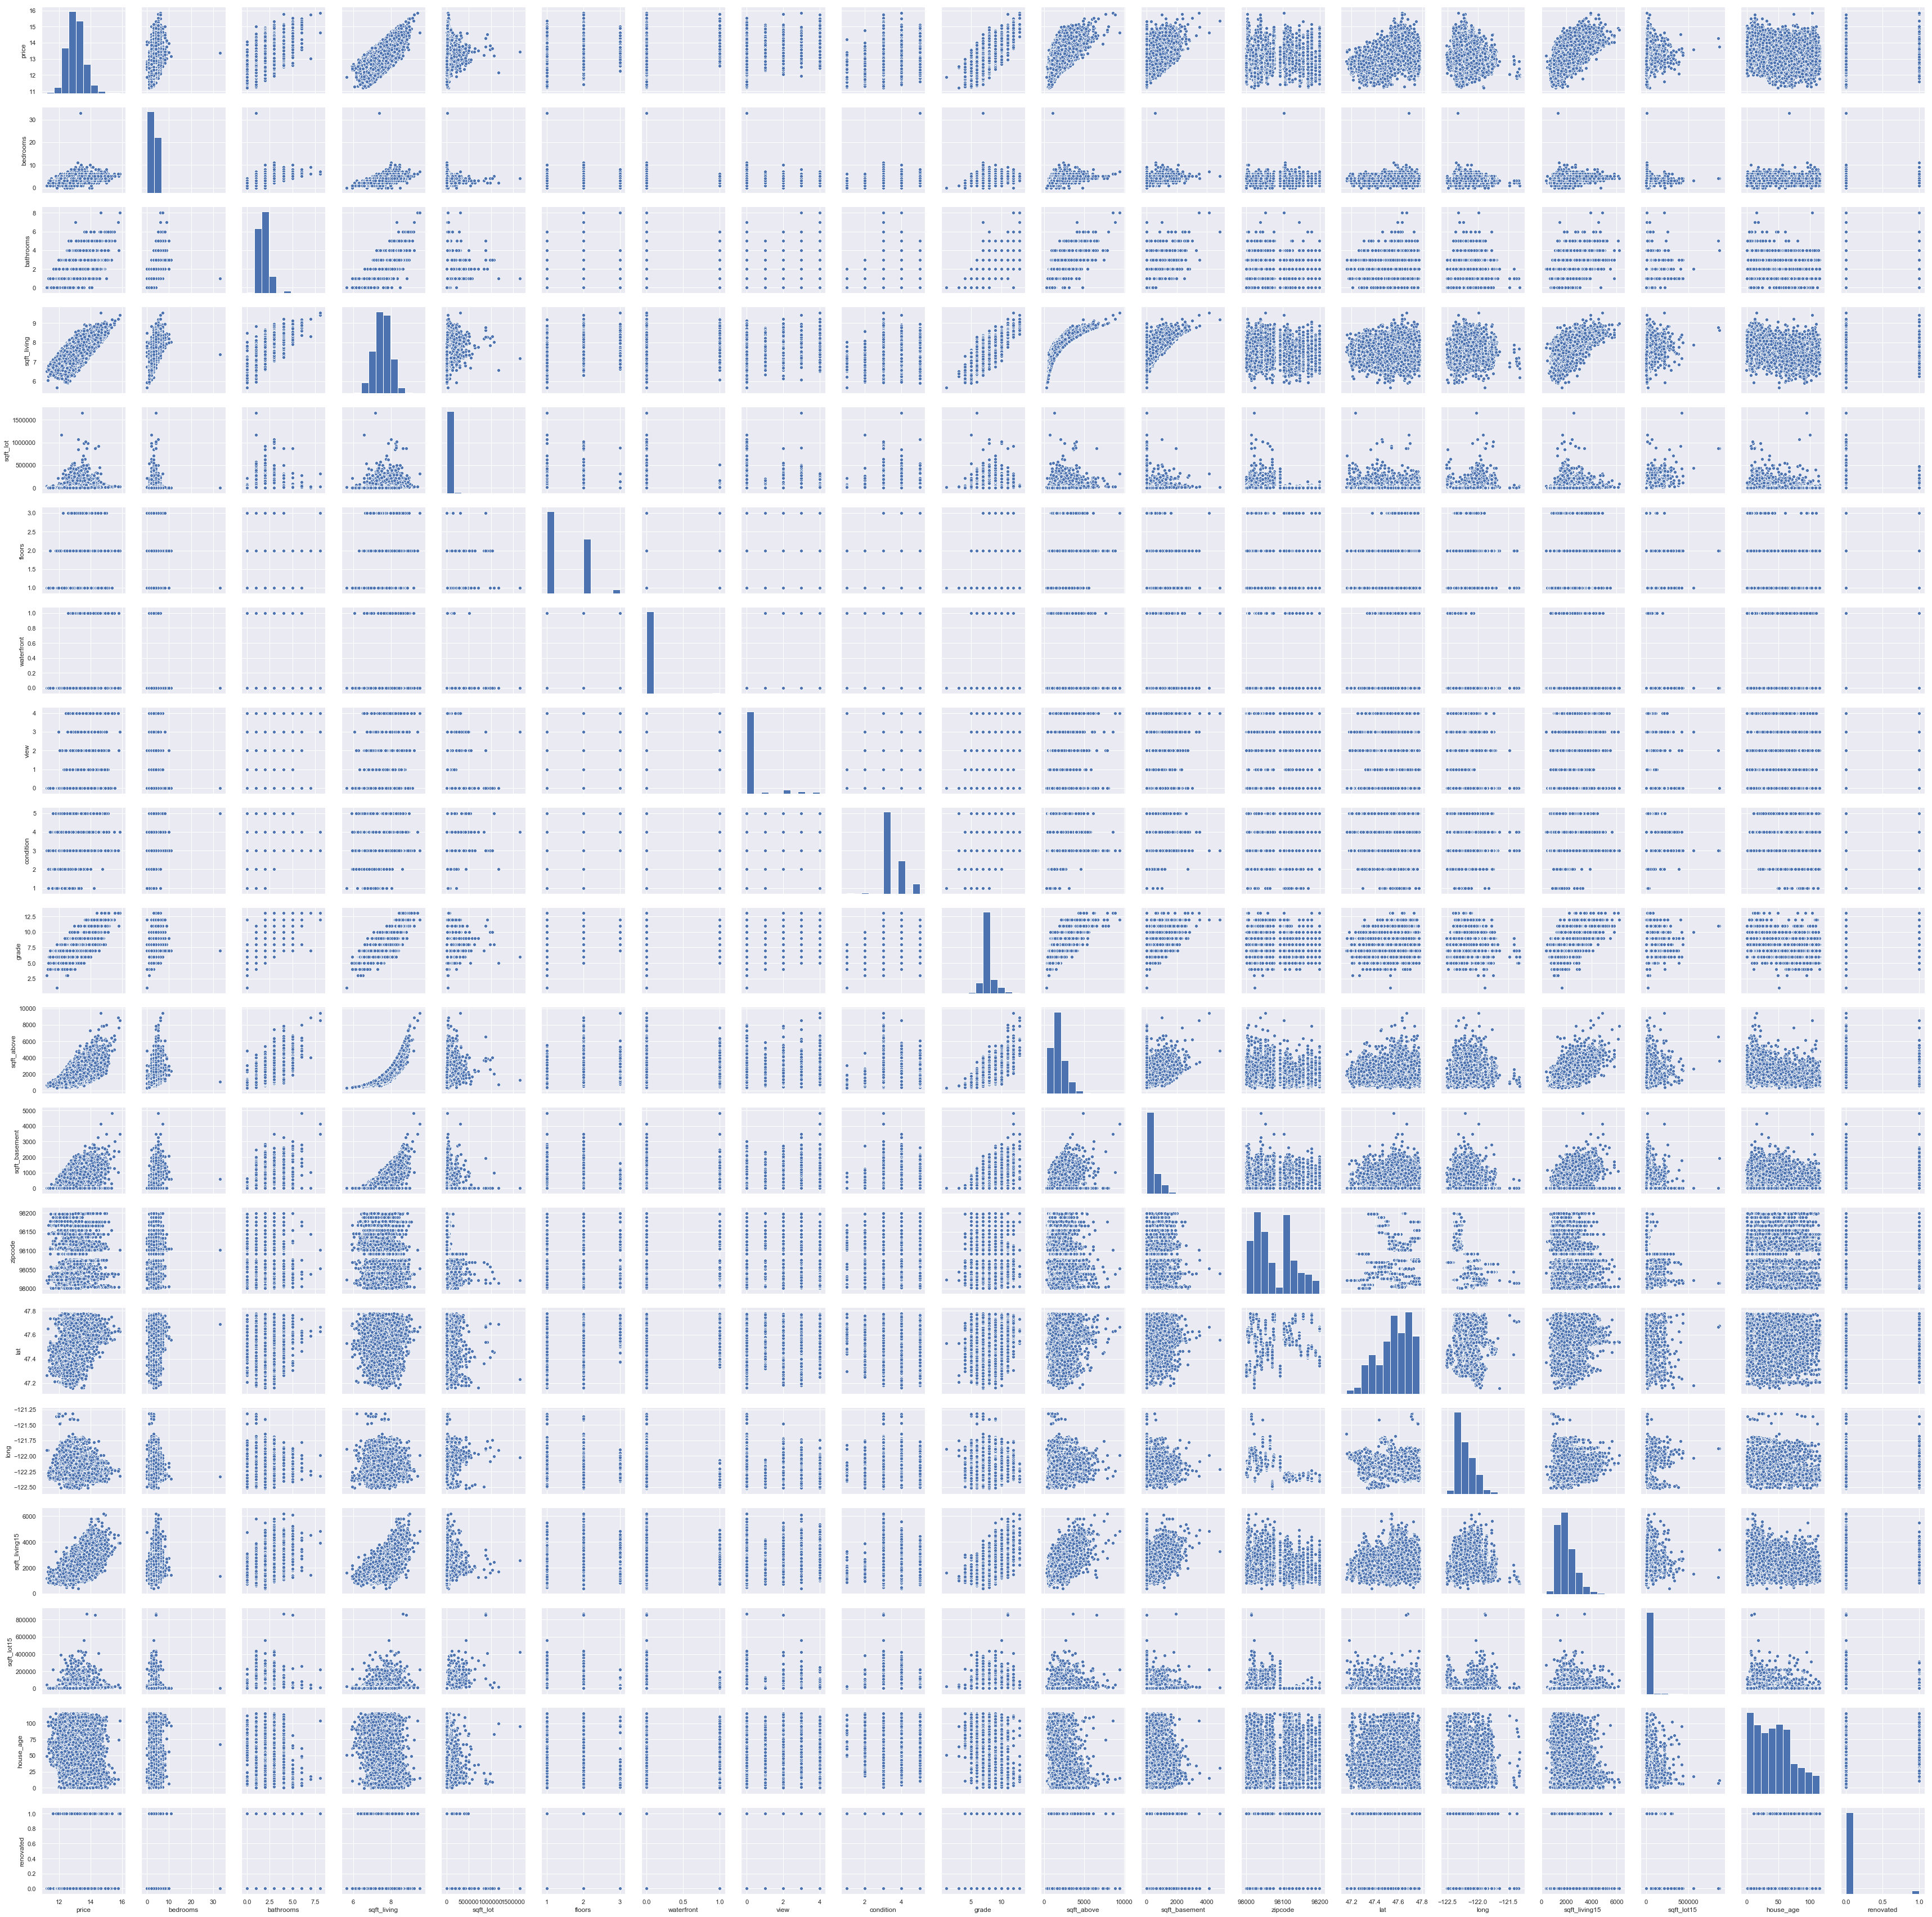

In [32]:
#scatterplot
sns.set()
sns.pairplot(house)
plt.show();

In [33]:
print('These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms and grade.  Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models.')

These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms and grade.  Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models.


# Summary of Ideas

In [34]:
#With distribution plot of price, 
#we can visualize that most of the prices of the house are 1 million with few outliers close to 8 million.

In [35]:
#The pie chart consists of count of individual category in our categorical bedrooms variable. 
#Through pie chart we can analyze that 3 bedrooms house is the most in Kings County followed by 4 and 2 bedrooms making 90% of the houses. 
#There are outliers in bedrooms which will be taken care of in our data preprocessing.

In [36]:
house = house.drop(house[house["bedrooms"]>10].index )

In [37]:
df_train= house

# Validation Dataset

In [38]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [39]:
# First extract the target variable which is our House prices
Y = house.price.values
# Drop price from the house dataframe and create a matrix out of the house data
house = house.drop(['price'], axis=1)
X = house.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = house.columns

In [40]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [41]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


# Evaluate Algorithms: Baseline

In [42]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'mean_squared_error'

In [43]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

In [44]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50
building tree 2 of 50building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50building tree 25 of 50

building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.3s finished


In [45]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" %"\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

		LinReg	RF	RFE	Mean
bedrooms	0.02	0.01	0.47	0.17
bathrooms	0.04	0.0	0.53	0.19
sqft_living	0.2	0.52	0.94	0.55
sqft_lot	0.0	0.05	0.06	0.04
floors	0.05	0.0	0.41	0.15
waterfront	0.27	0.02	0.88	0.39
view	0.04	0.02	0.59	0.22
condition	0.04	0.01	0.65	0.23
grade	0.11	1.0	0.76	0.62
sqft_above	0.0	0.04	0.18	0.07
sqft_basement	0.0	0.01	0.12	0.04
zipcode	0.0	0.03	0.29	0.11
lat	1.0	0.85	1.0	0.95
long	0.12	0.13	0.82	0.36
sqft_living15	0.0	0.07	0.24	0.1
sqft_lot15	0.0	0.04	0.0	0.01
house_age	0.0	0.07	0.35	0.14
renovated	0.05	0.0	0.71	0.25


In [46]:
#Now, with the matrix above, the numbers and layout does not seem very easy or pleasant to the eye. Therefore, let's just collate the mean ranking score attributed to each of the feature and plot that via Seaborn's factorplot.

In [47]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


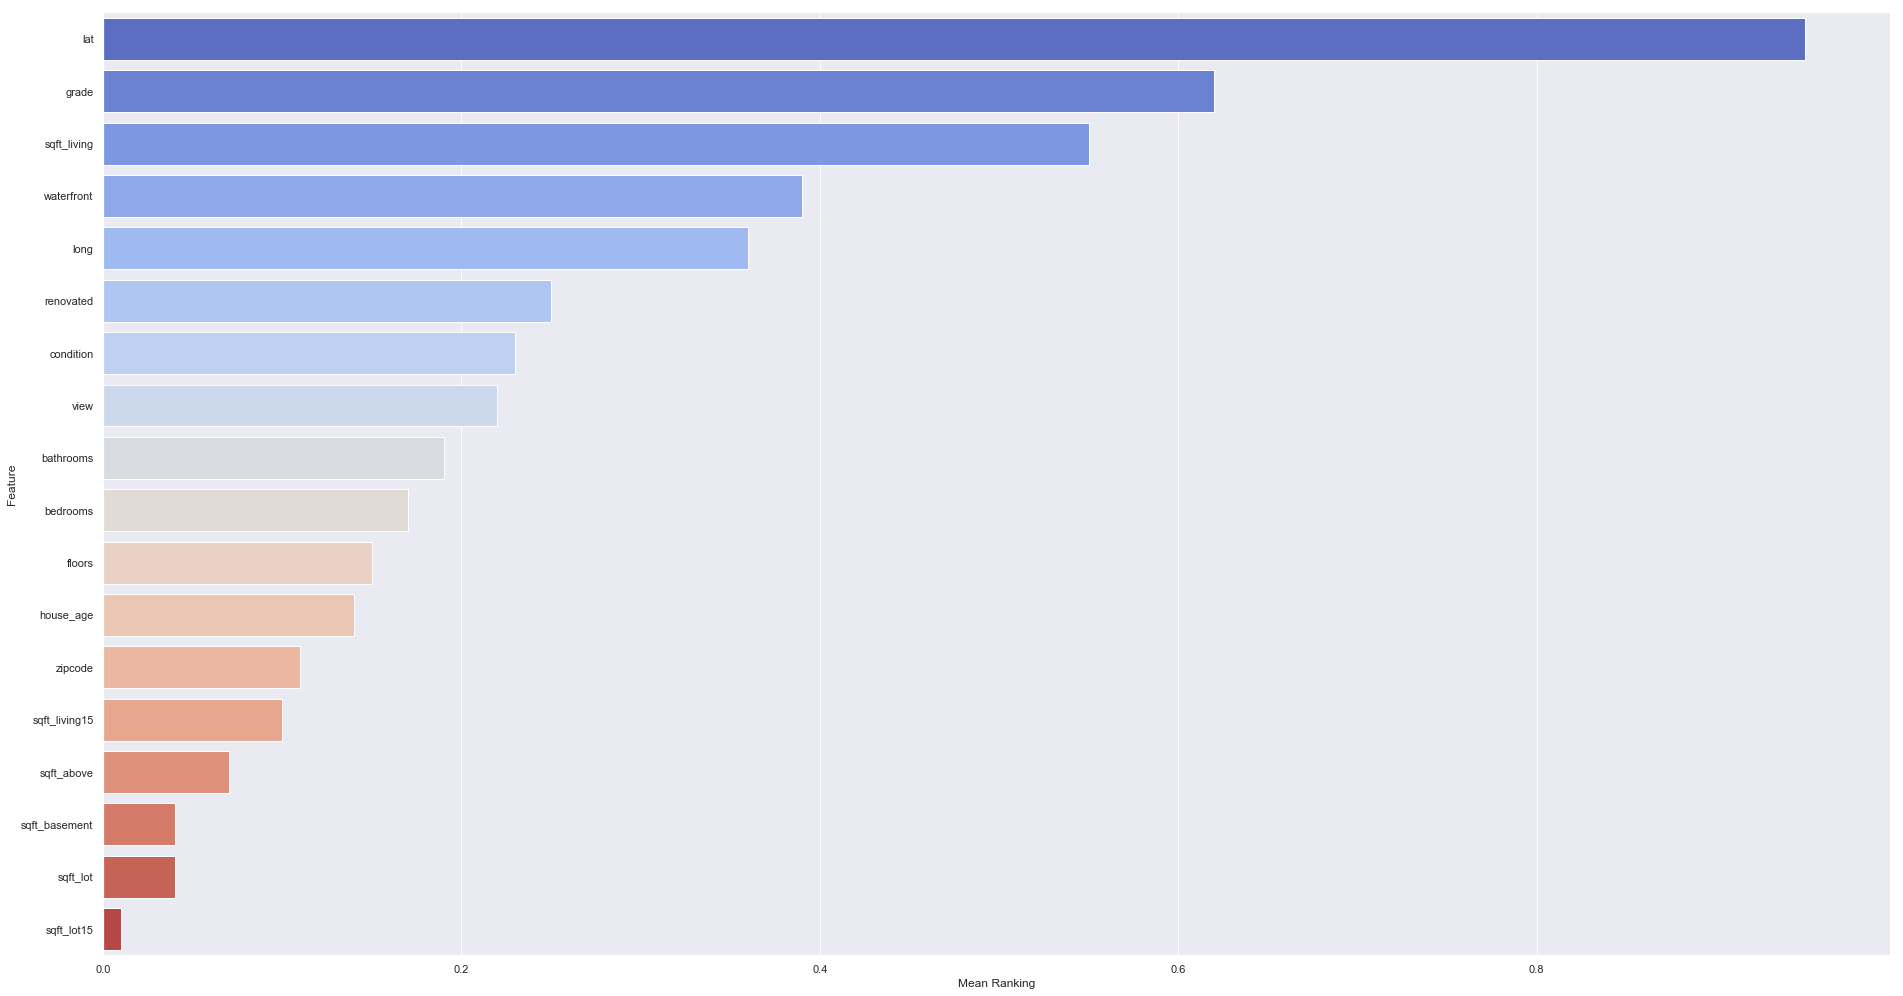

In [48]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [49]:
#Well as you can see from our feature ranking endeavours, the top 3 features are 'lat', 'waterfront' and 'grade'. 
#The bottom 3 are 'sqft_lot15', 'sqft_lot' and 'sqft_basement'. 
#This sort of feature ranking can be really useful, especially if one has many many features in the dataset and would like to trim or cut off features that contribute negligibly

# Evaluate Algorithms: Standardization

In [50]:
#standardizing data to mitigate skewdness and kurtosis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.4603806 ]
 [-3.38591442]
 [-3.33784491]
 [-3.31425896]
 [-3.29096242]
 [-3.27942047]
 [-3.26794827]
 [-3.24520974]
 [-3.22274031]
 [-3.22274031]]

outer range (high) of the distribution:
[[4.30867655]
 [4.31332336]
 [4.38291498]
 [4.55498006]
 [4.62399744]
 [4.64182521]
 [4.71833772]
 [5.12075553]
 [5.16908355]
 [5.33316673]]


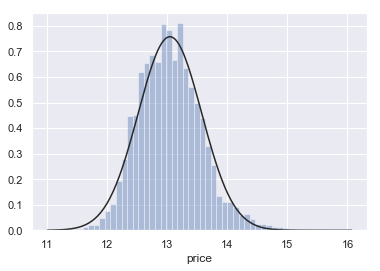

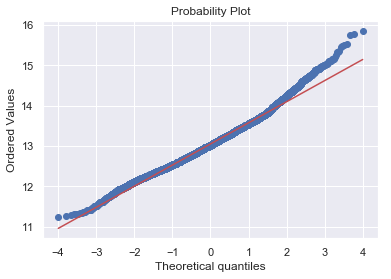

In [51]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [52]:
#We'll fix it by taking the log and fitting the plot to a normal distribution curve

In [53]:
#applying log transformation
df_train['price'] = np.log(df_train['price'])

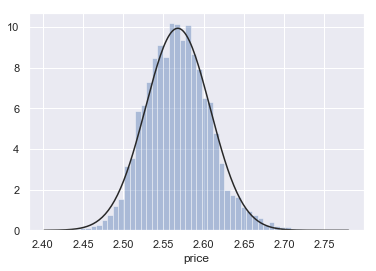

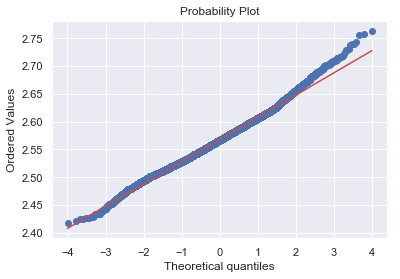

In [54]:
#transformed histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

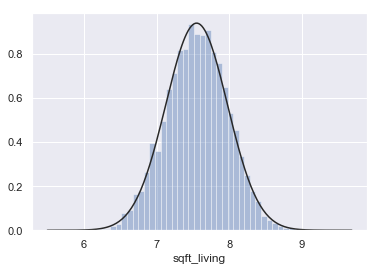

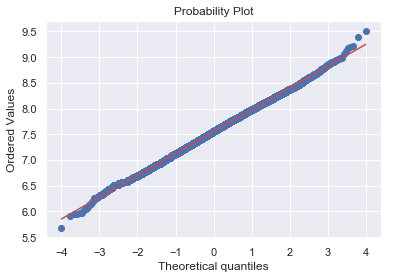

In [55]:
#histogram and normal probability plot
sns.distplot(df_train['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_train['sqft_living'], plot=plt)

In [56]:
#data transformation
df_train['sqft_living'] = np.log(df_train['sqft_living'])

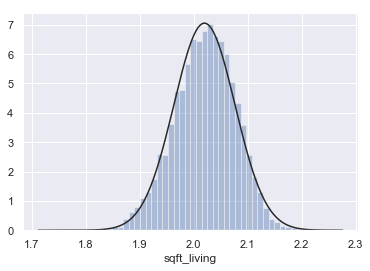

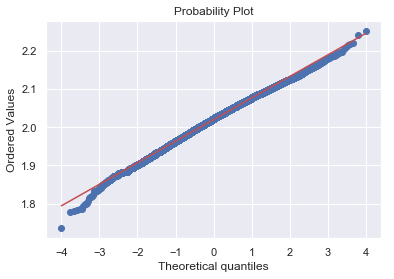

In [57]:
#transformed histogram and normal probability plot
sns.distplot(df_train['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_train['sqft_living'], plot=plt)

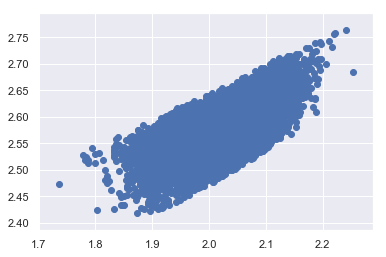

In [58]:
#scatter plot
plt.scatter(df_train['sqft_living'], df_train['price']);

In [59]:
Y = df_train.price.values

In [61]:
df_train.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  2.510410         3          1     1.956323      5650       1           0   
1  2.579884         3          2     2.060725      7242       2           0   
2  2.493264         2          1     1.894074     10000       1           0   
3  2.588616         4          3     2.025606      5000       1           0   
4  2.575826         3          2     2.005061      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0     0          3      7        1180              0    98178  47.5112   
1     0          3      7        2170            400    98125  47.7210   
2     0          3      6         770              0    98028  47.7379   
3     0          5      7        1050            910    98136  47.5208   
4     0          3      8        1680              0    98074  47.6168   

      long  sqft_living15  sqft_lot15  house_age  renovated  
0 -122.257           1340        5650         59          0  
1 -122.319           1690        7639         63          1  
2 -122.233           2720        8062         82          0  
3 -122.393           1360        5000         49          0  
4 -122.045           1800        7503         28          0

In [62]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated','house_age' ]
X=df_train[feature_cols]

# Improve Results With Tuning

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=3)

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 76%'

In [67]:
#So 76% accuracy with simple linear regression. Let's try more advanced algorithms.

In [68]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

In [69]:
# For accurate scoring
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

In [70]:
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [71]:
from sklearn import ensemble, tree, linear_model
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train, y_train)

In [72]:
train_test(ENSTest, x_train, x_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.6922187812262999
RMSE: 0.019416915443599702
Test
R2: 0.6873095334830005
RMSE: 0.01955340267275668


In [73]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, x_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.02)


In [74]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.9206013055209633
RMSE: 0.010707810204146193
Test
R2: 0.8812431352202329
RMSE: 0.012953428774236105


In [75]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, x_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.01)


In [76]:
#Gradient boosting seems to work well for this data set

# Ensemble Methods

In [77]:
import sys
!{sys.executable} -m pip install xgboost

In [78]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [79]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(x_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train)
# eval model
select_X_val = selection.transform(x_test)
# test 
select_X_test = selection.transform(x_test)

Scaled_SVR: 0.457444 (+/- 0.025469)
Scaled_RF_reg: 0.870320 (+/- 0.006407)
Scaled_XGB_reg: 0.869963 (+/- 0.004411)
Scaled_DT_reg: 0.760129 (+/- 0.009631)
Scaled_KNN_reg: 0.819704 (+/- 0.006399)
Scaled_Gboost-Reg: 0.872390 (+/- 0.004479)
Scaled_RFR_PCA: 0.591012 (+/- 0.009652)
Scaled_XGBR_PCA: 0.626356 (+/- 0.006238)


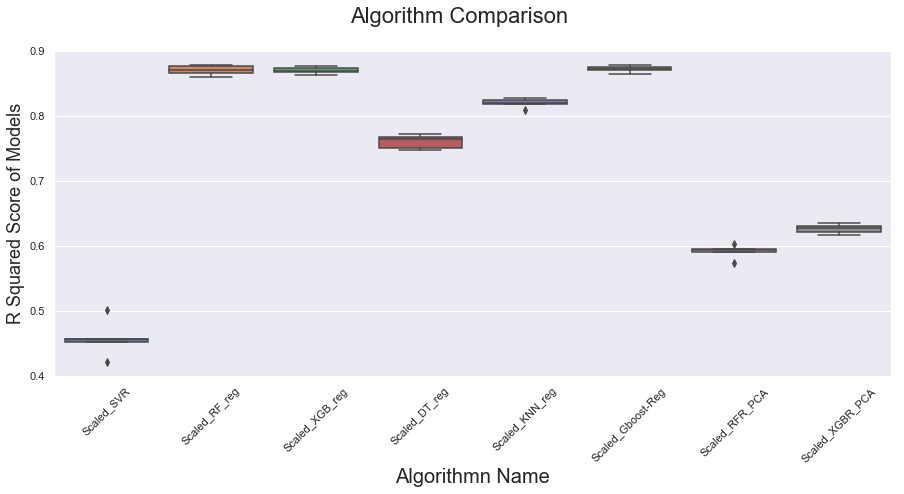

In [95]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 
pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))
pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 5

results, names  = [], [] 
for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


In [80]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [82]:
xgb.fit(x_train, y_train)
y_hat = xgb.predict(x_test)

In [84]:
xgb.score(x_test,y_test)

0.8898951241094746

In [85]:
#Excellent result of XGB Regressor with some arbitrary params.

#Now, let's explore the Random Search in RandomForest Regressor

In [88]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 178,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [91]:
# Predicting with best params
y_hat_Search = rf_random.predict(x_test)

In [93]:
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn.metrics import median_absolute_error # Mean squared error regression loss

In [94]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.8714
RandomForest Regressor Prediction R2-score: 0.8596

MSE of XGBoost Regressor: 0.006864155425163165
MSE of RandomForest Regressor: 0.006612893013547172 


In [ ]:
#XGBoost Regressor is giving good prediction